![Dr. Semmelweis](ignaz_semmelweis_1860.jpeg)

Hungarian physician Dr. Ignaz Semmelweis worked at the Vienna General Hospital with childbed fever patients. Childbed fever is a deadly disease affecting women who have just given birth, and in the early 1840s, as many as 10% of the women giving birth died from it at the Vienna General Hospital. Dr.Semmelweis discovered that it was the contaminated hands of the doctors delivering the babies, and on June 1st, 1847, he decreed that everyone should wash their hands, an unorthodox and controversial request; nobody in Vienna knew about bacteria.

You will reanalyze the data that made Semmelweis discover the importance of handwashing and its impact on the hospital.

The data is stored as two CSV files within the `data` folder.

`yearly_deaths_by_clinic.csv` contains the number of women giving birth at the two clinics at the Vienna General Hospital between the years 1841 and 1846.

| Column | Description |
|--------|-------------|
|`year`  |Years (1841-1846)|
|`births`|Number of births|
|`deaths`|Number of deaths|
|`clinic`|Clinic 1 or clinic 2|

`monthly_deaths.csv` contains data from 'Clinic 1' of the hospital where most deaths occurred.

| Column | Description |
|--------|-------------|
|`date`|Date (YYYY-MM-DD)
|`births`|Number of births|
|`deaths`|Number of deaths|

In [15]:
# Imported libraries
library(tidyverse)

# Start coding here..
yearly <- read.csv("data/yearly_deaths_by_clinic.csv")
monthly <- read.csv("data/monthly_deaths.csv")

yearly <- yearly %>%
	mutate(proportion_deaths = deaths/births)

monthly <- monthly %>%
	mutate(proportion_deaths = deaths/births)


date,births,deaths,proportion_deaths
<chr>,<int>,<int>,<dbl>
1841-01-01,254,37,0.145669291
1841-02-01,239,18,0.075313808
1841-03-01,277,12,0.043321300
1841-04-01,255,4,0.015686275
1841-05-01,255,2,0.007843137
1841-06-01,200,10,0.050000000
1841-07-01,190,16,0.084210526
1841-08-01,222,3,0.013513514
1841-09-01,213,4,0.018779343


`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?


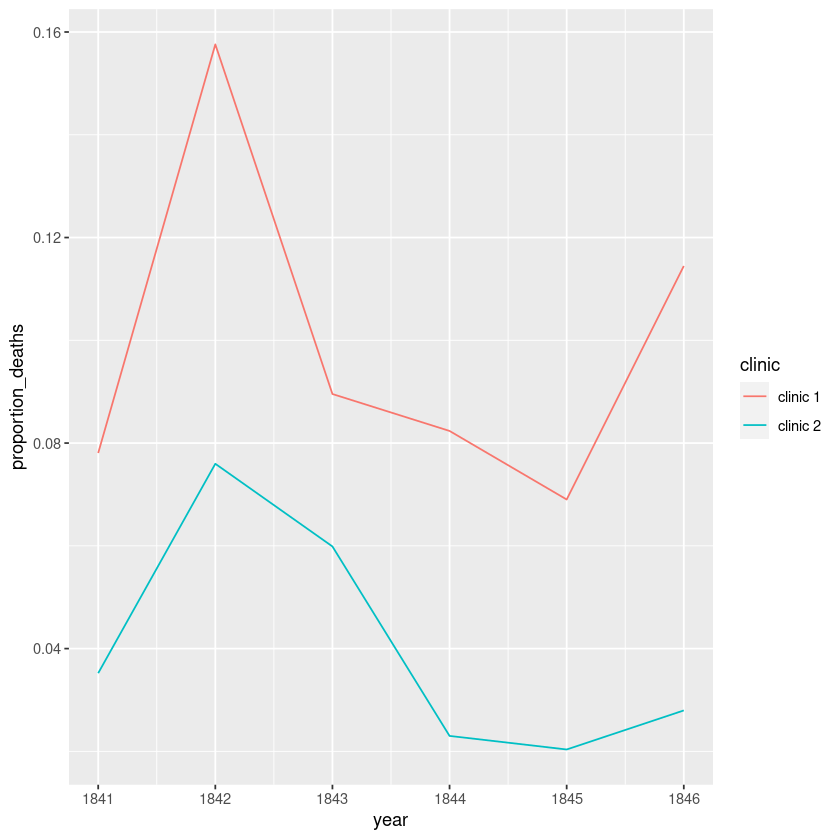

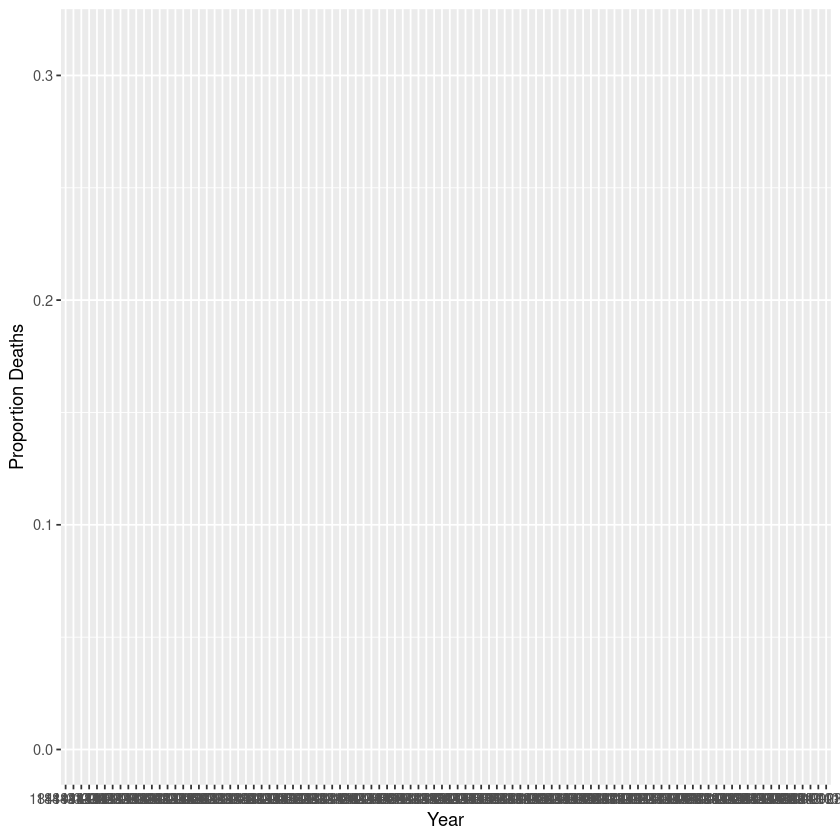

In [16]:
ggplot(yearly, aes(x = year, y = proportion_deaths, color = clinic)) +
	geom_line()

ggplot(monthly, aes(x = date, y = proportion_deaths)) +
	geom_line() +
labs(x = "Year", y = "Proportion Deaths")

In [45]:
handwashing_start <- as.Date('1847-06-01')
monthly <- monthly %>%
  mutate(handwashing_started = date >= handwashing_start)

In [46]:
monthly_summary <- monthly %>%
	group_by(handwashing_started) %>%
	summarize(mean_proportion_deaths = mean(proportion_deaths, na.rm = TRUE))

monthly_summary

handwashing_started,mean_proportion_deaths
<lgl>,<dbl>
FALSE,0.10504998
TRUE,0.02109338
